<a href="https://colab.research.google.com/github/sbowma15/ImageProcessingFilters/blob/main/ImageProcessingFilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

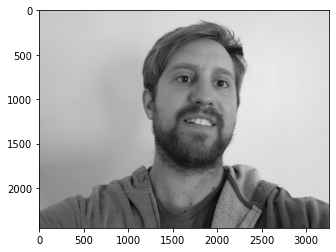

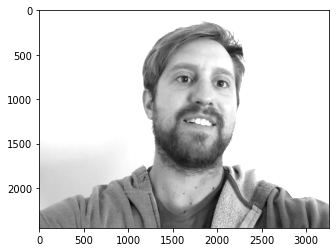

In [ ]:
import numpy as np
import cv2
import math
import random
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow

#1 The averaging filter
im = cv2.imread('/content/sample_data/shanepic2.jpg')
img = cv.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(img, cmap='gray', vmin=0,vmax=255)

#The actual averaging filter or "Kernal"
box= np.array(
    [[0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04]]
)
box2 = np.array(
    [[1/7,1/7,1/7],
    [1/7,1/7,1/7],
    [1/7,1/7,1/7]]
)

average = cv2.filter2D(img, -1,box2)
plt.figure()
plt.imshow(average,cmap='gray', vmin=0, vmax=225)

#########################################################

#Sobel Filter

Sobel_vert = np.array([
  [-1.0, 0.0, 1.0],
  [-2.0,0.0,2.0],
  [-1.0, 0.0, 1.0]
])
sobel_horiz = sobel_vert.T

dst_vert = cv2.filter2D(img, -1, sobel_vert)
dst_horiz = cv2.filter2D(img, -1, sobel_horiz)
plt.figure()
plt.title('Vert_by open cv')
plt.imshow(dst_vert, cmap='gray', vmin=0, vmax=255)
plt.title('Horiz_by opencv')
plt.imshow(dst_horiz,cmap='gray', vmin=0, vmax=255)

grad3=np.maximum(dst_vert, dst_horiz)
plt.figure()
plt.title('max Edge by open cv')
plt.imshow(grad3, cmap='gray', vmin=0, vmax=255)

#####################################################
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow

#this prints string "unaltered image" to distinguish unaltered photo
#unaltered = "unaltered image"
#print(unaltered)

#This reads .jpg file from  sample_data folder
im1=cv2.imread('/content/sample_data/shanepic2.jpg')

#This uses cv2 package "cv2_imshow()" function to display unaltered image, "im1"
#cv2_imshow(im1)

#this is the label for the gray scaled photo
#rayscaled = "Grayscaled photo"
#print(grayscaled)

#this gray scales the original photo and saves it as new obj, "gray" & displays
gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)

#blurred = cv2.GaussianBlur(gray, (11, 11), 0)
#cv2_imshow(blurred)

#blurred_float = blurred.astype(np.float32) /1.5

#cv2_imshow(blurred_float)

#edgeImg = cv2.Canny(blurred, threshold1=25, threshold2=35)

cv2_imshow(gray)

#cv2.imwrite("edge-raw.jpg", edgeImg)

#Before finding the significant edges we want get rid of "Salt and Pepper Noise"
#Taking out the noise helps to find the edges more efficiently
def filterOutSaltAndPepperNoise(edgeImg):
    #Count is going to be used as the iterator (its initiated at "0", quantity)
    count = 0
    #Putting "gray" into "lastMedian" for use in comparison in "while"
    #To be used in comparison with "median"
#lastMedian = gray
    #offsets image "gray" by one each iteration
    #(to be used for comparison with lastMedian as params for while)
median = cv2.medianBlur(gray, 1)

    #while continues until there is no difference in im
while not np.array_equal(lastMedian, edgeImg):

      #get the pixels that are zeroed out
      zeroed = np.invert(np.logical_and(median, gray))
      #puts the 0's into edgeImg
      edgeImg[zeroed] = 0

      #count iterates here
      count = count + 1

      #used to break off "while" at desired iterations
      if count > 70:
        break
lastMedian = median
median = cv2.medianBlur(edgeImg, 1)


edges_8u = np.asarray(edgeImg, np.uint8)
filterOutSaltAndPepperNoise(edges_8u)

#cv2.imwrite('saltpep.jpg',edges_8u)
#filterOutSaltAndPepperNoise(edges_8u)
cv2_imshow(edges_8u)

#def findSignificantContour(edges_8u):
#    contour, hierarchy = cv2.findContours(
 #       edges_8u,
  #      cv2.RETR_TREE,
  #      cv2.CHAIN_APPROX_SIMPLE
   # )

   # level1Meta = [1]
   # for contourIndex, tupl in enumerate(hierarchy[0]):
     #Each array is in format(next, prev, First Child, Parent)
      #Filter the ones without parent
     # if tupl[3] ==-1:
     #   tupl = np.insert(tuple.copy(),0 [contourIndex])
     #   level1Meta.append(tupl)
     #  break

    #Finding the largest contour by area
    #for tupl in level1Meta:
     #   contourIndex = tupl[0]
      #  contour =contour[contourIndex]
       # area = cv2.contourArea(contour)
    #contourswitharea.append([contour, area, contourIndex])

    #contourswitharea.sort(key=lambda meta: meta[1], reverse=true)
    #largestContour = contoursWithArea[0][0]

#contour = findSignificantContour(edges_8u)

  #drawing the contour over original image
#contourImg = np.copy(src)
#cv2.drawContours(contourImg, [contour], 0, (0, 255, 0), 2, cv2.LINEAA, maxLevel = 1)
#cv2.imwrite('contour.jpg', contourImg)
#cv2_imshow(contourImg)





